### Script to Visualise the Augmented Image & Bounding Boxes

In [13]:
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import os
import pybboxes as pbx
import cv2
%matplotlib inline

ia.seed(1)

In [10]:
PATH = "."
ext ='.jpg'

image_list = [os.path.join(PATH,file) for file in os.listdir(PATH) if file.endswith(ext)]

In [11]:
def create_bbs_list_from_image(img_name:str, path_to_labels:str):
    filename = os.path.splitext(os.path.basename(img_name))[0] + '.txt'
    with open(os.path.join(path_to_labels, filename), 'r') as f:
        #rstrip() takes individual lines in file without final \n, split() splits at every space
        list_bounding_boxes= [line.rstrip().split() for line in f]
    f.close()
    #two for loops: as list[list]; check for float or int for each item in inside list based on '.'
    return [[float(i) if '.' in i else int(i) for i in item] for item in list_bounding_boxes]

In [16]:
def get_bbs_augment_object(list_bbs:list, img_shape:tuple):

# https://nbviewer.org/github/aleju/imgaug-doc/blob/master/notebooks/B02%20-%20Augment%20Bounding%20Boxes.ipynb
# https://stackoverflow.com/questions/62459621/how-to-batch-process-with-multiple-bounding-boxes-in-imgaug

# voc : Pascal VOC : [x-tl, y-tl, x-br, y-br] Top-left coordinates & Bottom-right coordinates
# yolo : YOLO : [x-c, y-c, w, h] Center coordinates & width & height


    def create_BoundingBox(bbox, w, h):
        bbox_mod = pbx.convert_bbox(bbox[1:],"yolo", "voc", image_size= (int(h), int(w)))
        #print(bbox_mod, bbox)
        return BoundingBox(bbox_mod[1], bbox_mod[0], bbox_mod[3], bbox_mod[2], bbox[0])
        #return BoundingBox(bbox[1]*h, bbox[2]*w, bbox[3]*h, bbox[4]*w, bbox[0])
    
    
    return BoundingBoxesOnImage([create_BoundingBox(bbox, float(img_shape[1]), float(img_shape[0]))for bbox in list_bbs], img_shape)


In [17]:
def get_img_shape(path:str):
    im = cv2.imread(path)
    return im.shape


/tmp/ipykernel_15138/46545841.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join(PATH, image))


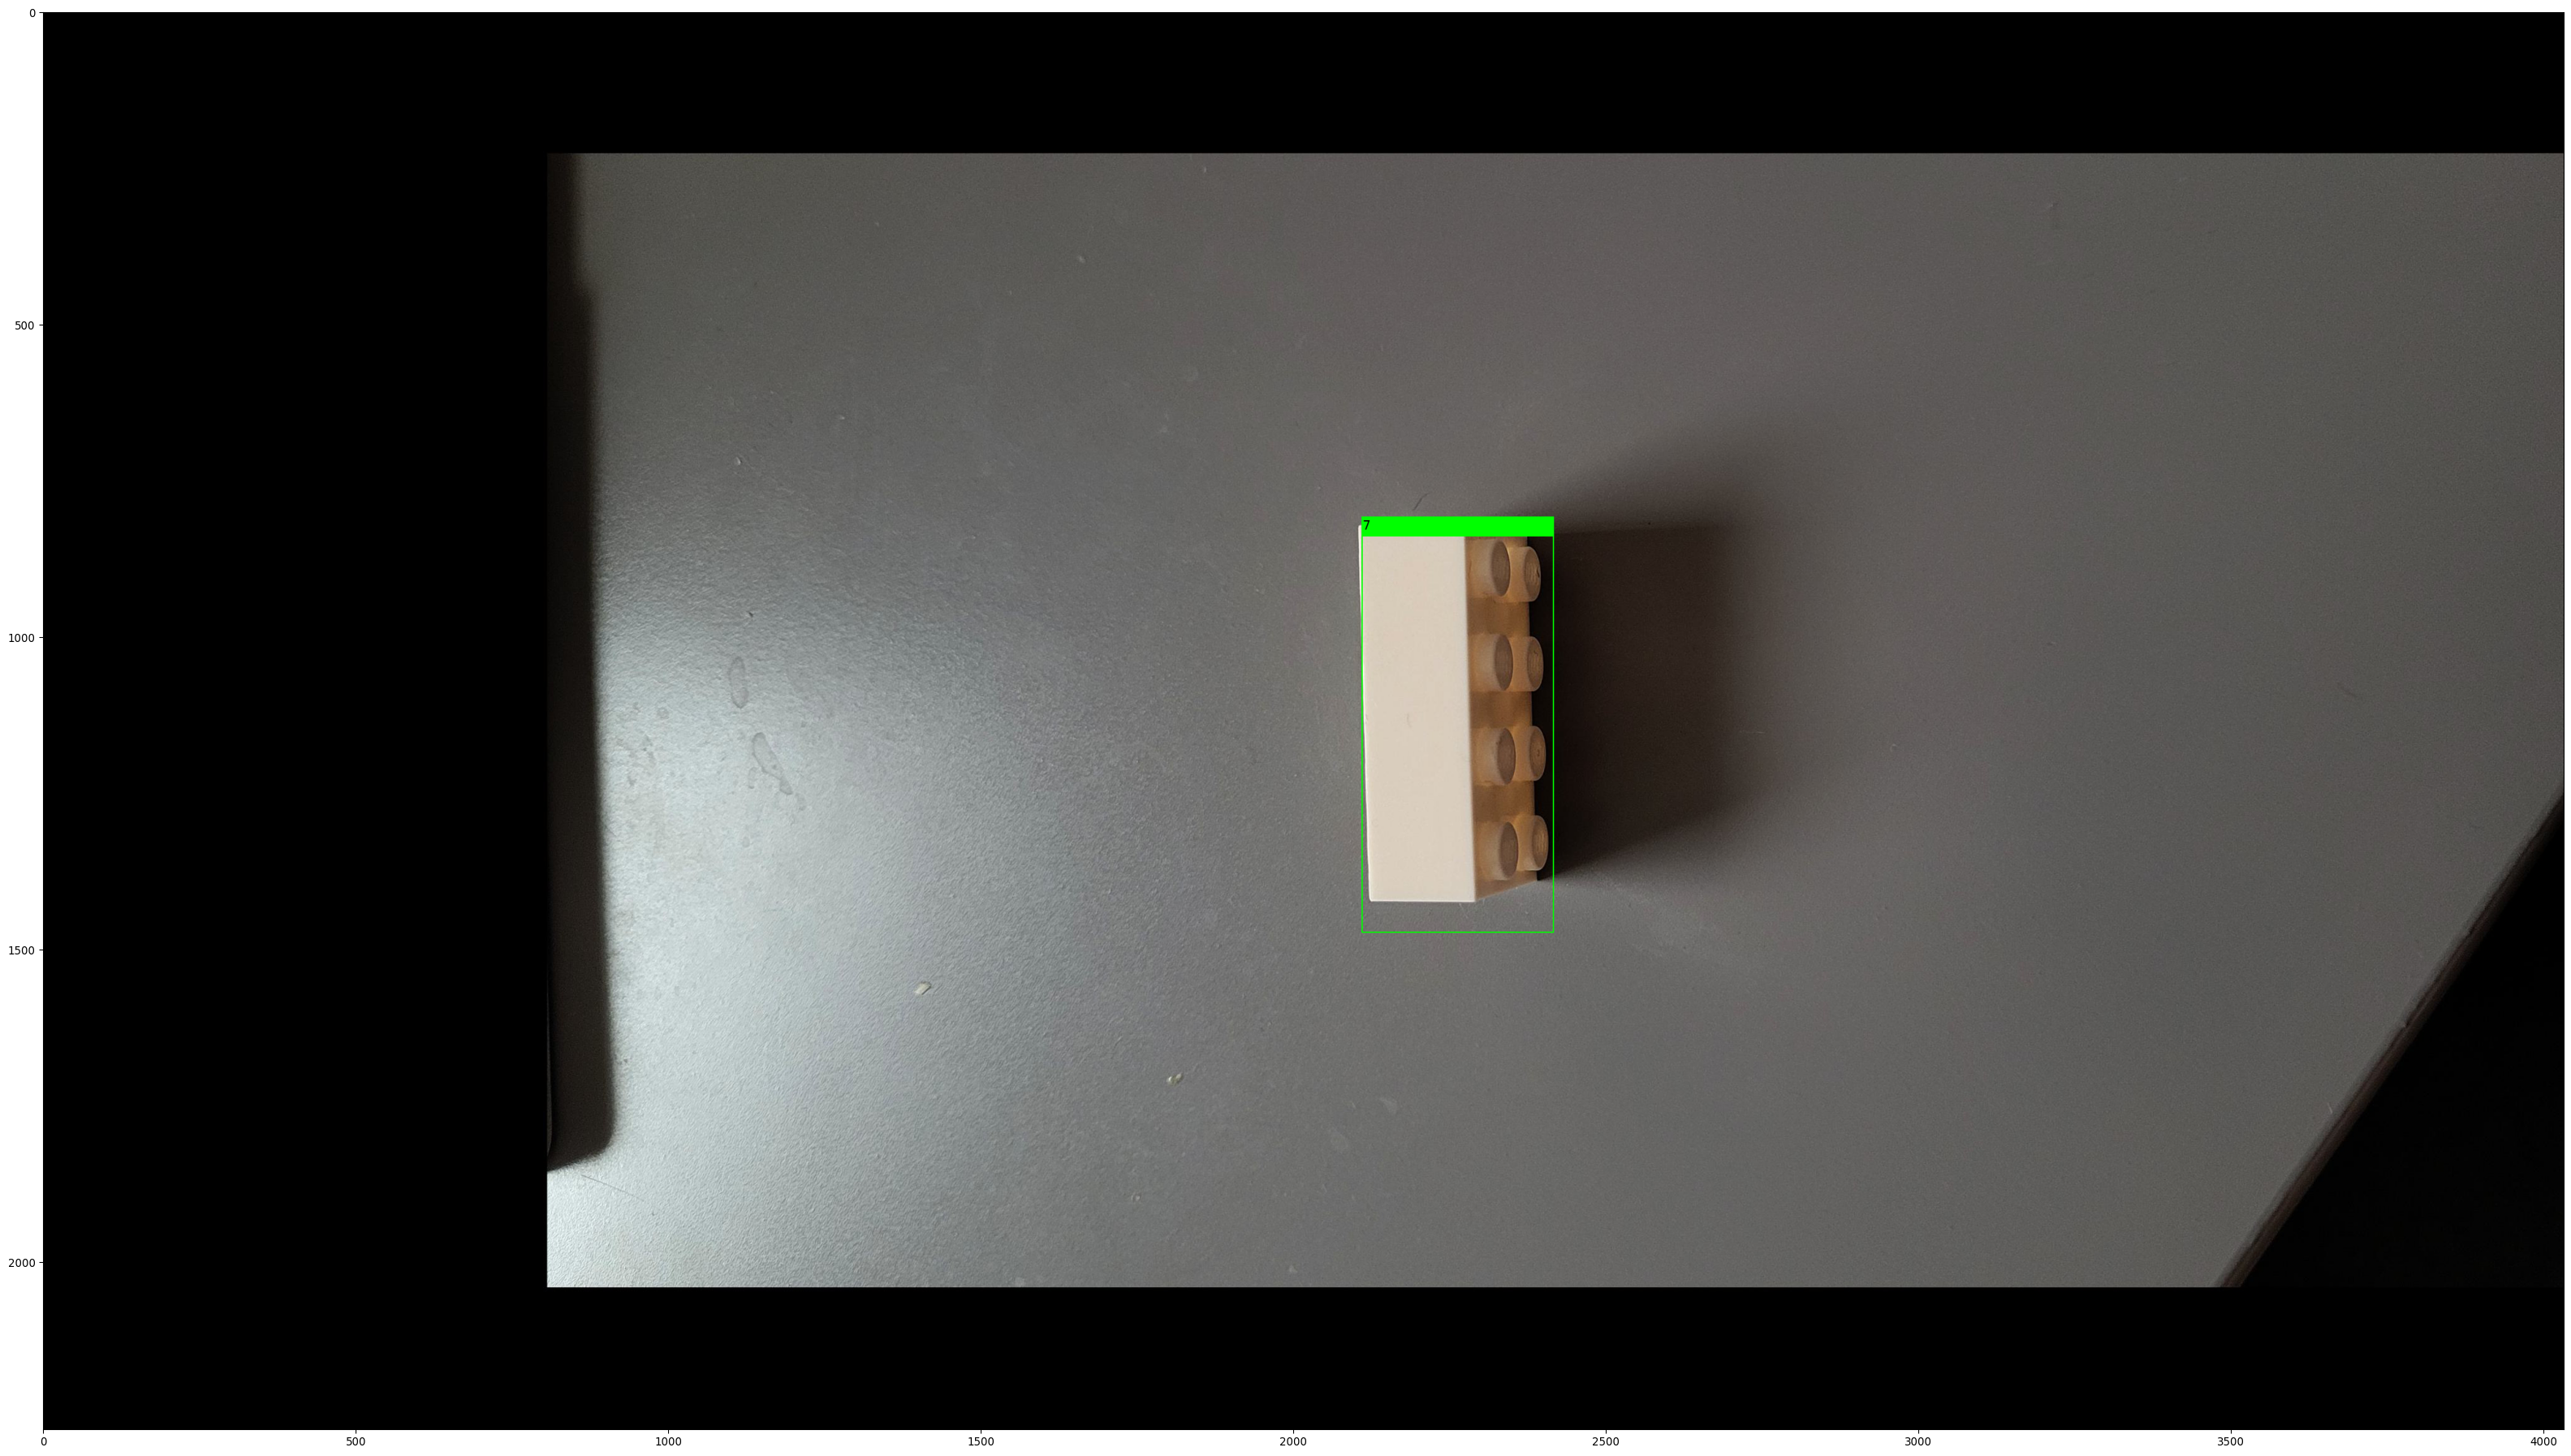

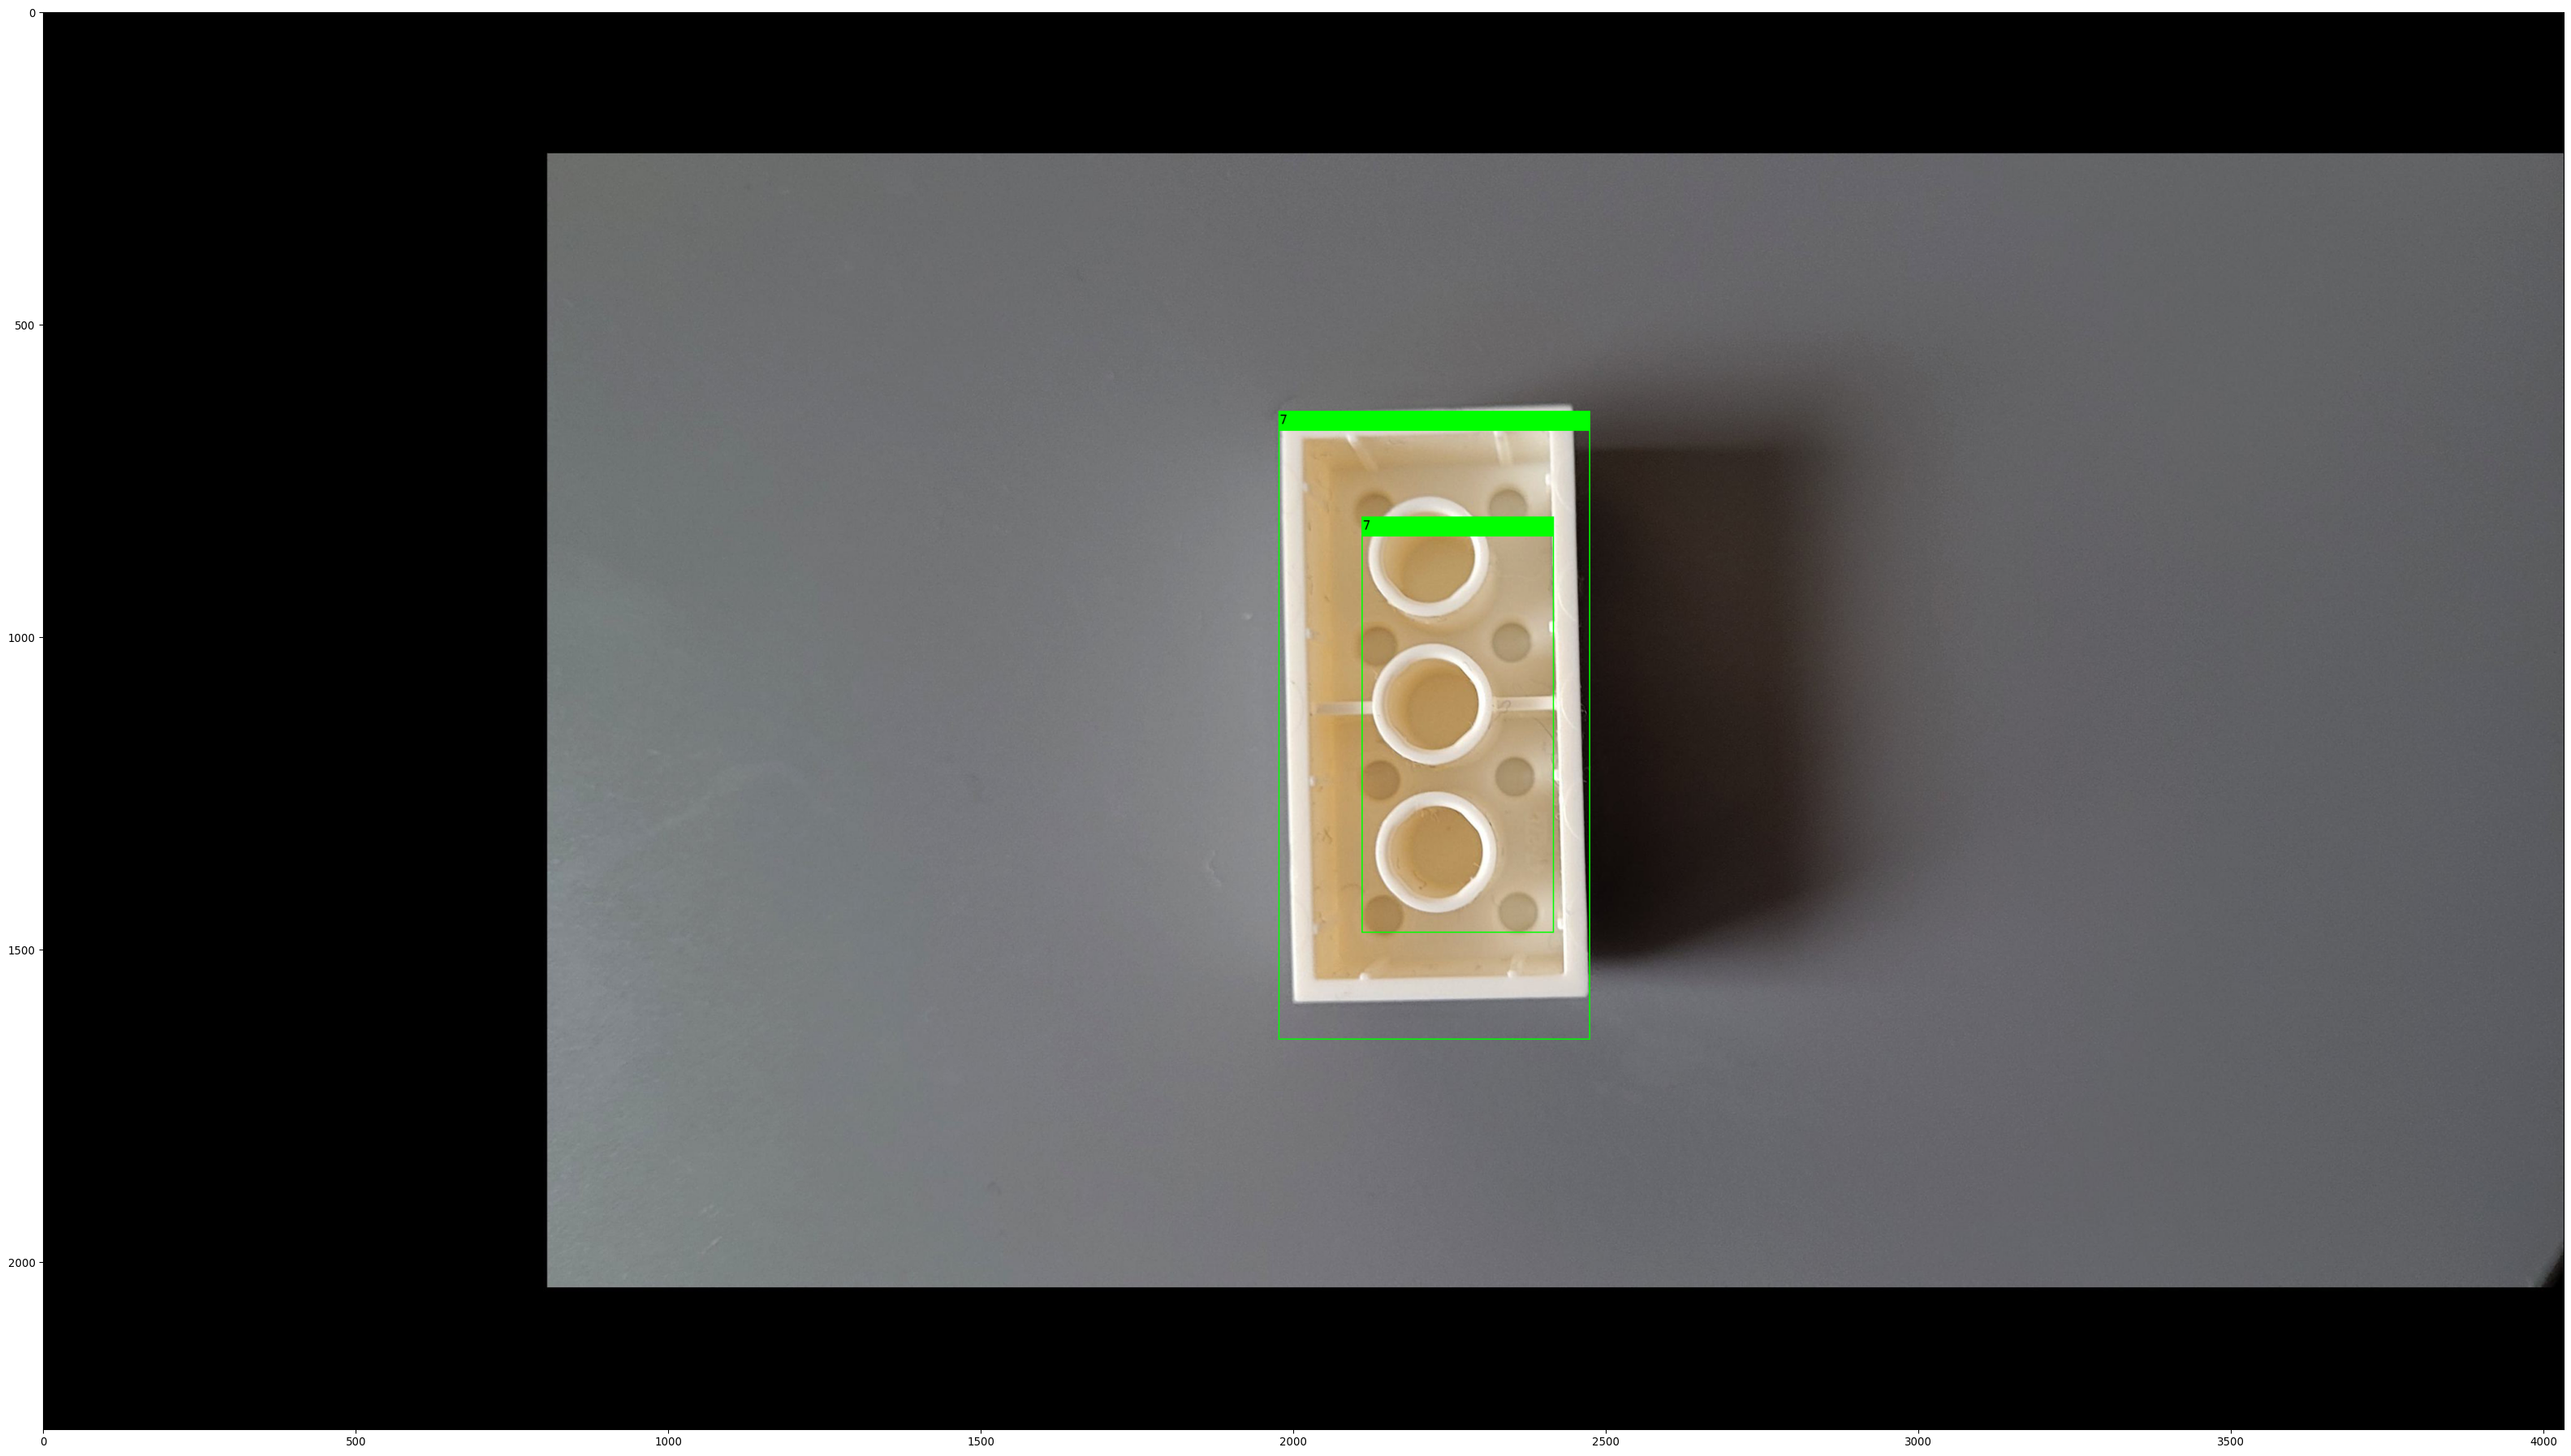

In [18]:
for image in image_list:
    img = imageio.imread(os.path.join(PATH, image))
    bbs = get_bbs_augment_object(create_bbs_list_from_image(image, PATH), get_img_shape(image))
    ia.imshow(bbs.draw_on_image(img, size= 2))